<a href="https://colab.research.google.com/github/AlejandroVillazonG/mat281_portfolio/blob/master/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
tintos = pd.read_csv('winequality-red.csv', sep=';')
tintos.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
tintos.columns = tintos.columns.str.lower().str.replace(" ","_")
tintos.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
tintos.isnull().any()
#tintos.isna().sum()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
ph                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [20]:
tintos["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Total')

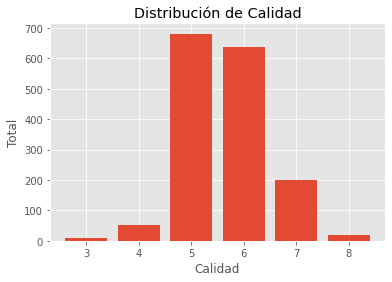

In [6]:
plt.figure(figsize=(6,4))
plt.bar(tintos["quality"].unique(), tintos["quality"].value_counts())

plt.title("Distribución de Calidad")
plt.xlabel("Calidad")
plt.ylabel("Total")

#sns.countplot(tintos["quality"])

In [21]:
calidad = []
for row in tintos["quality"]:
  if row<=5:
    new="baja"
  elif row<=7:
    new="media"
  else:
    new="alta"
  calidad.append(new)
tintos["new_quality"] = calidad 

tintos.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,baja
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,baja
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,baja
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,media
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,baja


In [22]:
tintos['new_quality'].value_counts()

media    837
baja     744
alta      18
Name: new_quality, dtype: int64

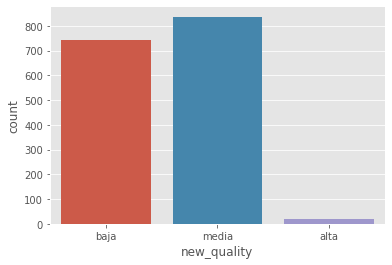

In [23]:
sns.countplot(tintos["new_quality"])

In [24]:
tintos.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


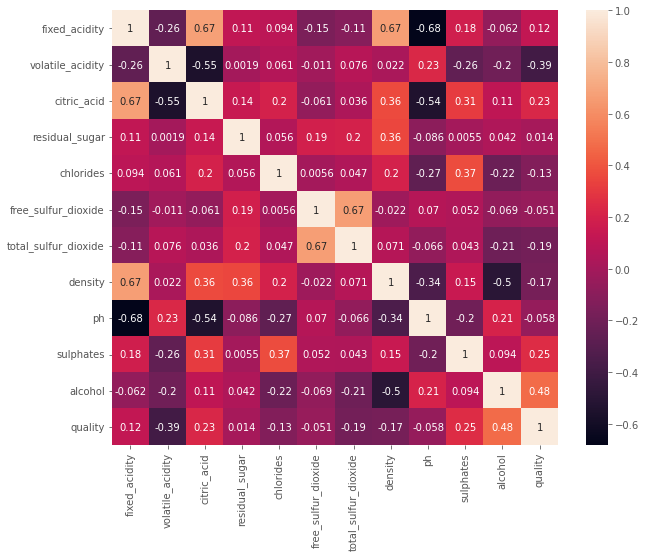

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(tintos.corr(),annot=True)
plt.show()

In [57]:
#Clasificando con la variable de respuesta "quality"
X = tintos.drop(['quality',"new_quality"], axis=1)
y = tintos['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Tasa de error: %d" %(round(100*(y_test != y_pred).sum()/X_test.shape[0])) + "%")
#SVM = SVC(C = 10, kernel = 'linear', random_state=123)
#y_pred_SVM = SVM.fit(X_train, y_train).predict(X_test)

Number of mislabeled points out of a total 320 points : 148
Tasa de error: 46%


In [55]:
#Clasificando con la nueva variable de calidad "new_quality"

X1 = tintos.drop(["quality","new_quality"], axis=1)
y1 = tintos["new_quality"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=12)
gnb = GaussianNB()
y1_pred = gnb.fit(X1_train, y1_train).predict(X1_test)
print("Número de observaciones MAL etiquetadas de un total de %d observaciones: %d" %(X1_test.shape[0], (y1_test != y1_pred).sum()))
print("Tasa de error: %d" %(round(100*(y1_test != y1_pred).sum()/X1_test.shape[0])) + "%")

Número de observaciones MAL etiquetadas de un total de 320 observaciones: 89
Tasa de error: 28%


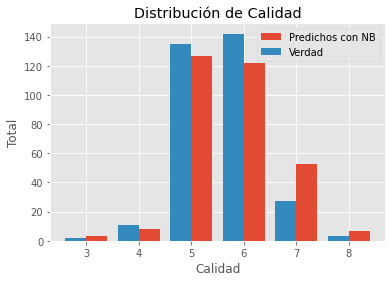

In [59]:
dic={}
for i in y_pred:
  if i not in dic:
    dic[i]=0
  dic[i]+=1
plt.figure(figsize=(6,4))

plt.bar(np.array(list(dic.keys()))+0.2, list(dic.values()),0.4, label = "Predichos con NB")
plt.bar(y_test.unique()-0.2, y_test.value_counts(), 0.4, label = "Verdad")

plt.title("Distribución de Calidad")
plt.xlabel("Calidad")
plt.ylabel("Total")
plt.legend()

##ARCHIVO CON LOS DATOS DE VINOS BLANCOS

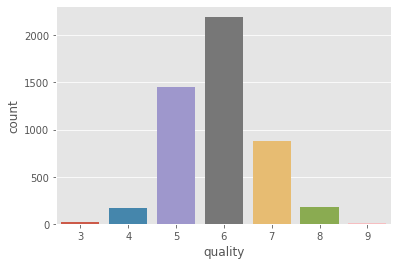

In [4]:
blancos = pd.read_csv('winequality-white.csv', sep=';')
blancos.columns = blancos.columns.str.lower().str.replace(" ",".")
#blancos.head()
#blancos.describe()
#blancos.isnull().any() #ALL FALSE
sns.countplot(blancos["quality"])

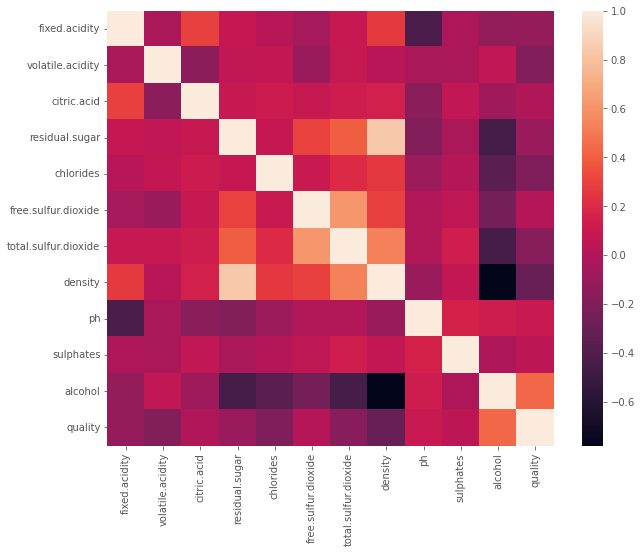

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(blancos.corr())
plt.show()

In [6]:
#Agrupamos las calidades en 3 grupos
# 0 si la calidad es menor o igual a 5
# 1 si la calidad es igual a 6
# 2 si la calidad es igual o mayor a 7

new = []
for row in blancos["quality"]:
  if row<6:
    value = 0
  elif row == 6:
    value = 1
  else:
    value = 2
  new.append(value)
blancos["new_quality"] = new
blancos.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,ph,sulphates,alcohol,quality,new_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


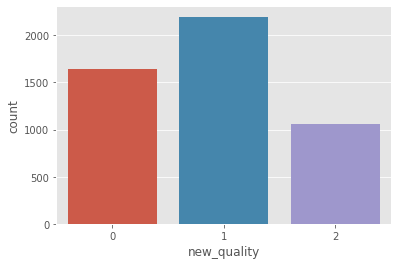

In [7]:
sns.countplot(blancos["new_quality"])

In [14]:
#Clasificando con la variable de respuesta "quality"
#NAIVE BAYES
X = blancos.drop(['quality',"new_quality"], axis=1)
y = blancos['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1323)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Tasa de error: %d" %(round(100*(y_test != y_pred).sum()/X_test.shape[0])) + "%")

#SVM = SVC(C = 10, kernel = 'linear', random_state=123)
#y_pred_SVM = SVM.fit(X_train, y_train).predict(X_test)
#y_pred_SVM

Number of mislabeled points out of a total 980 points : 556
Tasa de error: 57%


In [22]:
#Clasificando con la variable de respuesta "new_quality"
#NAIVE BAYES
X = blancos.drop(['quality',"new_quality"], axis=1)
y = blancos['new_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Tasa de error: %d" %(round(100*(y_test != y_pred).sum()/X_test.shape[0])) + "%")

Number of mislabeled points out of a total 980 points : 518
Tasa de error: 53%


In [9]:
import numpy as np
for i in range(1,10):
  print("n =",i,":",round(((2*np.pi)**(i+1))/((i+1)*4*i**(i+1)),5))

n = 1 : 4.9348
n = 2 : 2.58386
n = 3 : 1.20258
n = 4 : 0.47816
n = 5 : 0.16408
n = 6 : 0.04932
n = 7 : 0.01317
n = 8 : 0.00316
n = 9 : 0.00069
